In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df_amz = pd.read_csv("/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Labs/Week 5/amz_uk_price_prediction_dataset.csv")

In [4]:
df_amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
crosstab_result = pd.crosstab(df_amz['category'], df_amz['isBestSeller'], normalize="index")

crosstab_result = round(crosstab_result, 5)

crosstab_result.sort_values(by=[True], ascending=False)

isBestSeller,False,True
category,,
Grocery,0.94187,0.05813
Smart Home Security & Lighting,0.94231,0.05769
Health & Personal Care,0.94231,0.05769
Mobile Phone Accessories,0.95753,0.04247
Power & Hand Tools,0.96466,0.03534
...,...,...
"CD, Disc & Tape Players",1.00000,0.00000
General Music-Making Accessories,1.00000,0.00000
Snowboard Boots,1.00000,0.00000


There is no category where being a best-seller is more prevalent. 

In [6]:
from scipy.stats import chi2_contingency

In [7]:
# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(3.9128454445480045, 1.0)

There is no sufficient evidence to conclude that the variables are related.

In [8]:
crosstab_result_2 = pd.crosstab(df_amz['category'], df_amz['isBestSeller'])

crosstab_result_2.head()

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3


In [9]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result_2, method="cramer")

0.1222829439760564

In [10]:
df_sorted = crosstab_result_2.sort_values(by=True, ascending=False)
df_best = df_sorted.iloc[0:3]

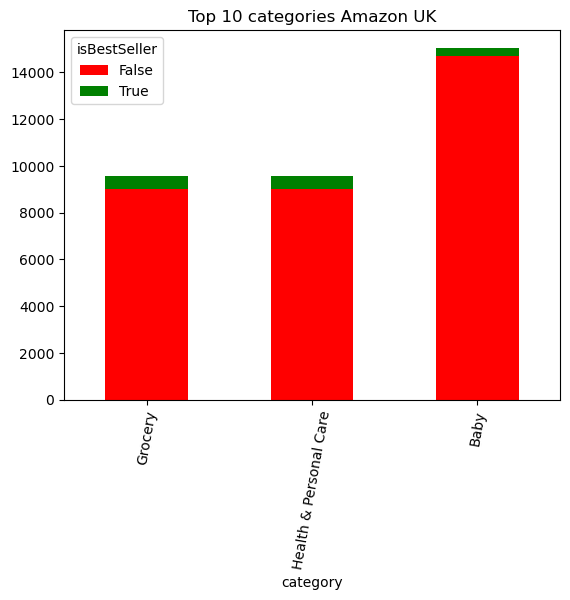

In [11]:
df_best.plot(kind='bar', stacked=True,
        title='Top 10 categories Amazon UK', color=["red", "green"])
plt.xticks(rotation=80)
plt.show()

In [12]:
df_amz.head(20)

df_amz.shape

(2443651, 9)

In [13]:
Q1 = df_amz["price"].quantile(0.25)
Q3 = df_amz["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

upper_array = np.where(df_amz["price"] >= upper)[0]
lower_array = np.where(df_amz["price"] <= lower)[0]

df_amz.drop(index=upper_array, inplace=True)
df_amz.drop(index=lower_array, inplace=True)

In [14]:
df_amz.shape

(2115963, 9)

In [15]:
counts = df_amz['category'].value_counts()
top_categories = counts.nlargest(20).index

top_categories



Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [16]:
df_filtered = df_amz[df_amz['category'].isin(top_categories)]
df_filtered.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products


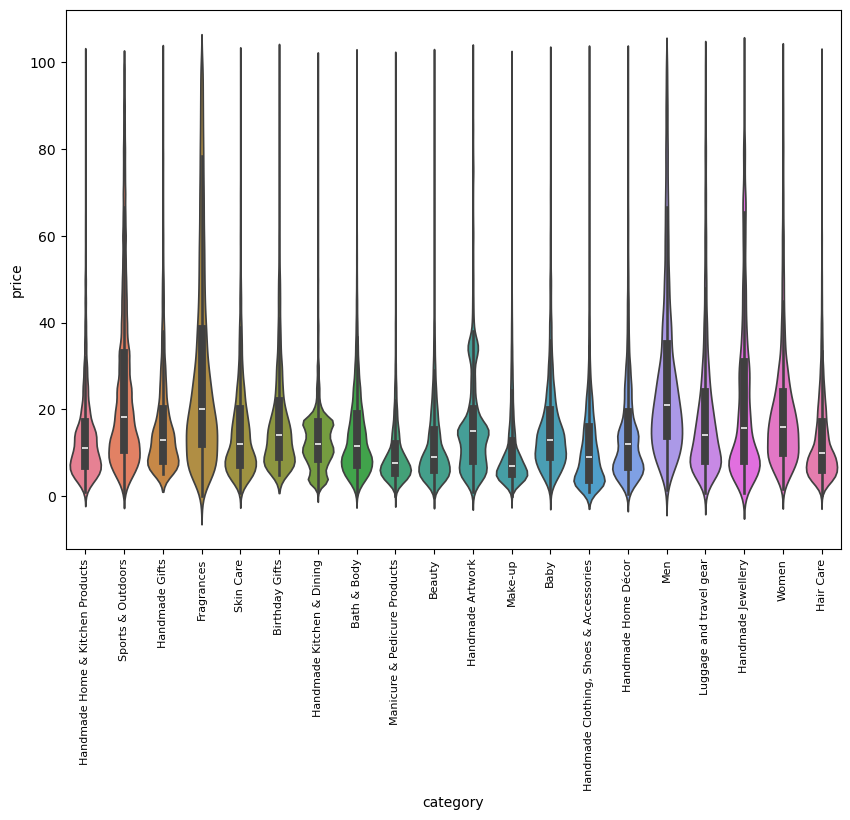

In [17]:
plt.figure(figsize=(10, 7))
sns.violinplot(data=df_filtered, x="category", y="price", hue="category")
plt.xticks(fontsize=8, rotation=90)
plt.show()

In [18]:
df_price_median = df_amz.groupby("category").aggregate({"price": "median"})

In [19]:
df_price_median.sort_values(by="price", ascending=False)

,price
category,
Desktop PCs,74.00
Boxing Shoes,69.79
Tablets,69.00
Graphics Cards,68.54
Motherboards,67.92
...,...
Adapters,7.05
Make-up,7.00
Signs & Plaques,6.99


The category that has the highest median price is Desktop PCs.

In [20]:
counts = df_amz['category'].value_counts()
top_categories = counts.nlargest(10).index

In [21]:
df_filtered = df_amz[df_amz['category'].isin(top_categories)]
df_filtered.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors


In [22]:
df_grouped = df_filtered.groupby("category").aggregate({"price": "mean"})

In [23]:
df_bars = df_grouped.sort_values(by="price", ascending=False)

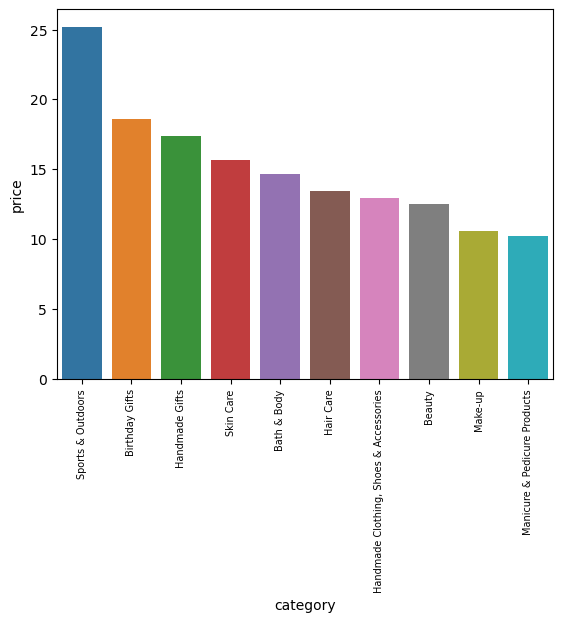

In [24]:
sns.barplot(data=df_bars, x="category", y="price", hue="category")
plt.xticks(fontsize=7, rotation=90)
plt.show()

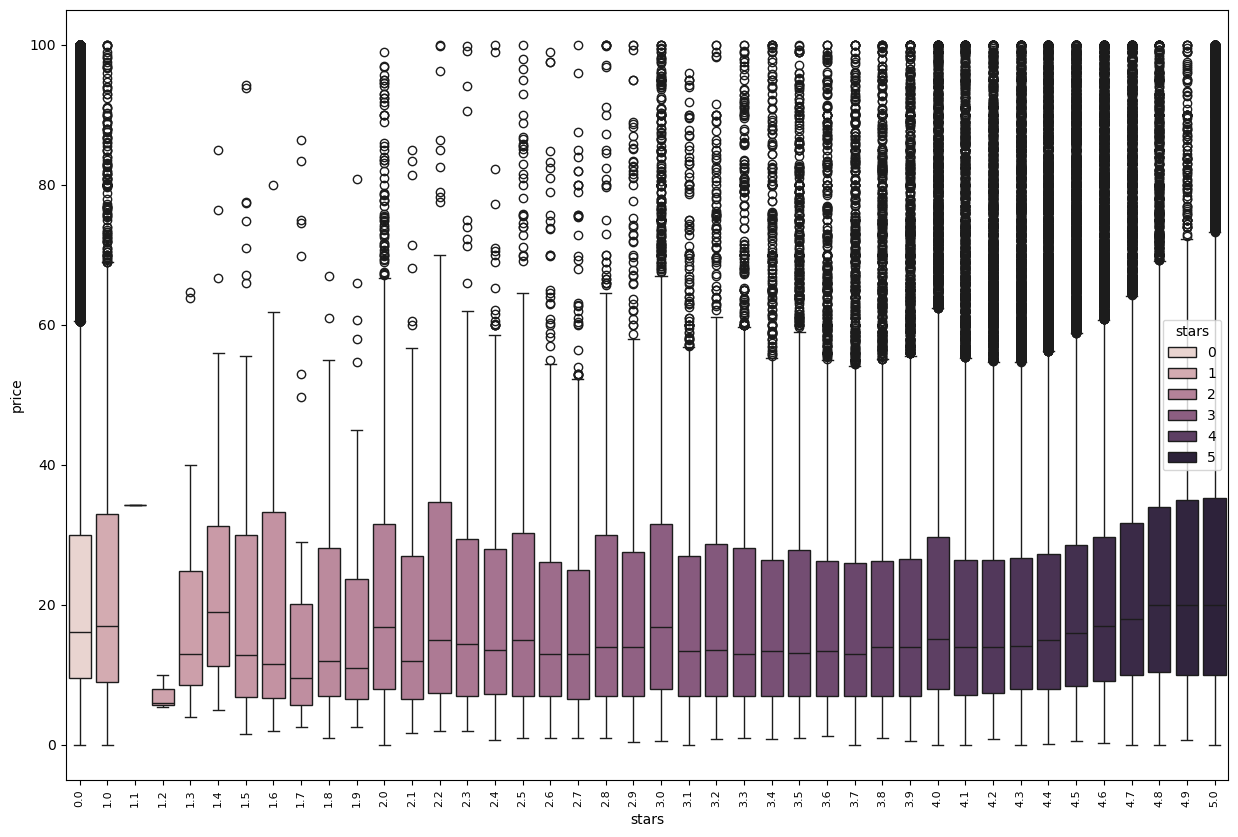

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x="stars", y="price", hue="stars", data=df_filtered)
plt.xticks(fontsize=8, rotation=90)
plt.show()

In [26]:
df_stars_median = df_amz.groupby("category").aggregate({"stars": "median"})

In [27]:
df_stars_median.sort_values(by="stars", ascending=False)

,stars
category,
Computer Memory,4.7
Building & Construction Toys,4.6
Office Paper Products,4.6
Luxury Food & Drink,4.6
Kids' Play Figures,4.6
...,...
Hockey Shoes,0.0
Hi-Fi Receivers & Separates,0.0
Handmade Kitchen & Dining,0.0


The category that received the highest median rating was Computer Memory.

In [38]:
df_amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [29]:
coeff_pearson = df_amz['price'].corr(df_amz['stars'])

In [30]:
coeff_spearman = df_amz['price'].corr(df_amz['stars'], method='spearman')

print(f"{coeff_pearson, coeff_spearman}")

(-0.07767299878181352, -0.06679697280768393)


Since the Pearson and Spearman coefficients are both really close to zero, it is not possible to confirm that there's a correlation between these two variables.

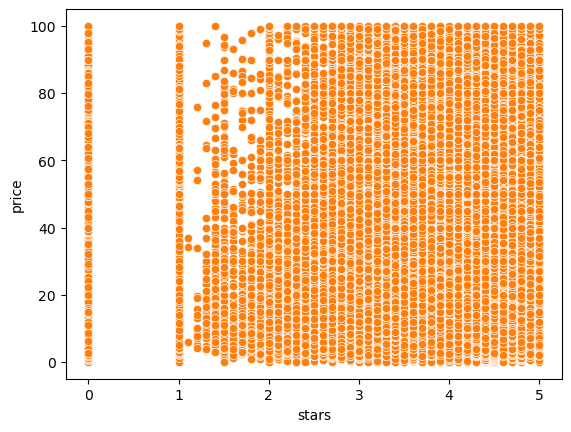

In [ ]:
sns.scatterplot(data=df_amz, y="price", x="stars")
plt.show()

The patterns that can be observed on the scatterplot are: 
- between 0 and 1 stars, there are no products which is probably due to the fact that "stars" is a discrete numerical variable;
- between 1 and 2 stars the price ranges are more concentrated between 0 and 40; 
- it's not possible to determine a correlation between these two variables, since there are too many values for both of them.


In [41]:
df_amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [52]:
potential_numerical = df_amz.select_dtypes("number")
potential_numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [54]:
df_amz_numerical = df_amz.select_dtypes("number").drop(columns=["uid"])
df_amz_numerical.head()

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0


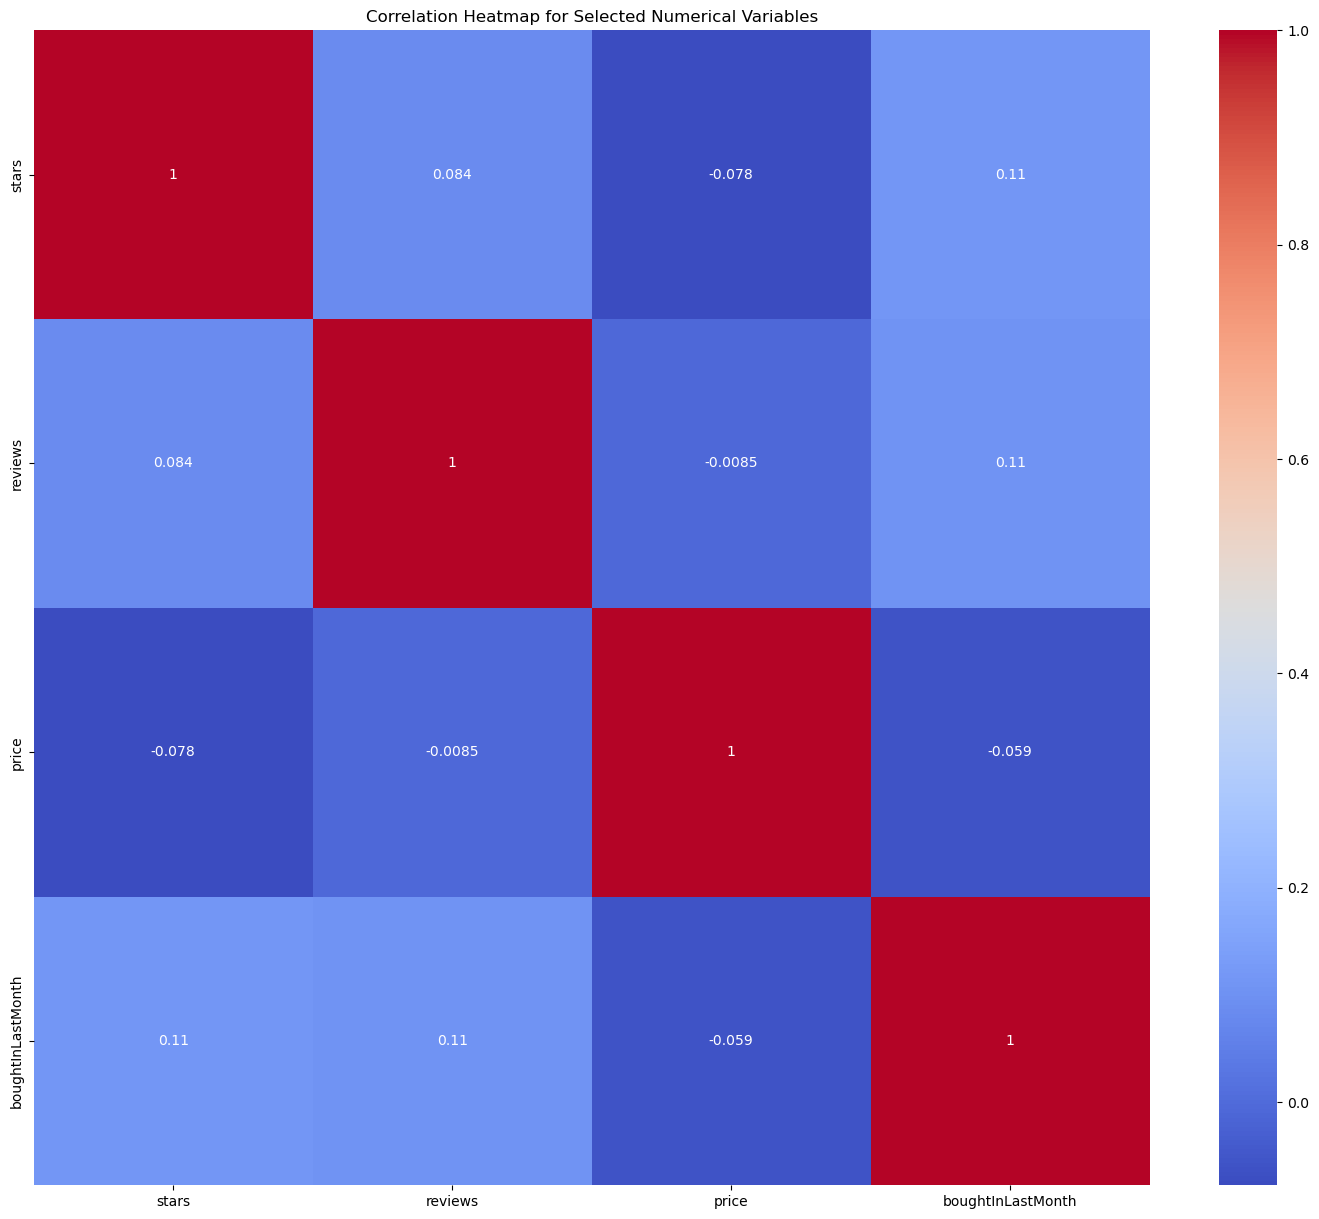

In [55]:
correlation_matrix = df_amz_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

Observing the heatmap, it's possible to conclude that for all numerical variables, there isn't a strong correlation for none of the possible variables' pairs.

In [56]:
import statsmodels.api as sm

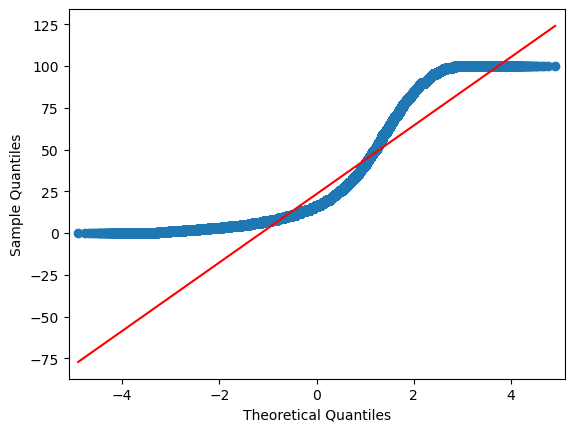

In [59]:
sm.qqplot(df_amz['price'], line='s');
plt.show()

Observing the QQ plot, it is possible to conclude that the price values don't follow a normal distribution and that the values are over-dispersed according to the shape of the curve.